In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds

Positive reviews are 25000 and negative reviews are 25000 of total 50000 


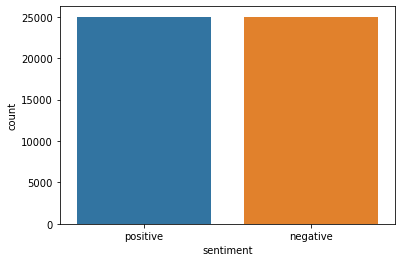

In [2]:
dataset = pd.read_csv("C:\Users\prana\Desktop\rotten_tomatoes_movies.csv")
negative = len(dataset[dataset['sentiment']=='positive'])
positive = len(dataset) - negative
sns.countplot(dataset['sentiment'])
print('Positive reviews are {} and negative reviews are {} of total {} '.format(positive,negative,len(dataset)))

In [3]:
le = LabelEncoder()
training_reviews,testing_reviews,training_labels,testing_labels  = train_test_split(dataset['review'].values,dataset['sentiment'].values,test_size = 0.2)
training_labels = le.fit_transform(training_labels)
testing_labels = le.fit_transform(testing_labels)

# Pre-Processing The Text


In [4]:
tokenizer = Tokenizer(num_words=10000,oov_token='<OOV>')
tokenizer.fit_on_texts(training_reviews)
word_index = tokenizer.word_index
training_sequence = tokenizer.texts_to_sequences(training_reviews)
testing_sequence = tokenizer.texts_to_sequences(testing_reviews)
train_pad_sequence = pad_sequences(training_sequence,maxlen = 200,truncating= 'post',padding = 'pre')
test_pad_sequence = pad_sequences(testing_sequence,maxlen = 200,truncating= 'post',padding = 'pre')
print('Total Unique Words : {}'.format(len(word_index)))

Total Unique Words : 112660


Using glove vectors for embedding

In [6]:
embedding_matrix = np.zeros((len(word_index) + 1,200))
for word, i in word_index.items():
    embedding_vector = embedded_words.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Creating The Model
layer1: Embedding Layer using glove weights

layer2: Using a Bidirectional LSTM

layer3: A dropout Layer

layer4: A Dense layer of 256 neurons with 'relu' activation

layer5: A Dense Layer of 128 neurons with 'relu' activation

layer6: Again a dropout layer.

layer7: Sigmoid activation layer to classify it positive and negative.

In [7]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(len(word_index) + 1,200,weights=[embedding_matrix],input_length=200,
                            trainable=False),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(256,activation = 'relu',),
                             tf.keras.layers.Dense(128,activation = 'relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(1,activation = tf.nn.sigmoid)])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 200)          22532200  
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               135680    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

In [9]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy() , optimizer='Adam' , metrics = 'accuracy')
history = model.fit(train_pad_sequence,training_labels,epochs = 5 ,validation_data=(test_pad_sequence,testing_labels))

Epoch 1/5
1250/1250 [==============================] - 159s 122ms/step - loss: 0.6004 - accuracy: 0.6605 - val_loss: 0.3601 - val_accuracy: 0.8383
Epoch 2/5
1250/1250 [==============================] - 161s 128ms/step - loss: 0.3709 - accuracy: 0.8389 - val_loss: 0.3436 - val_accuracy: 0.8547
Epoch 3/5
1250/1250 [==============================] - 163s 130ms/step - loss: 0.3320 - accuracy: 0.8585 - val_loss: 0.3045 - val_accuracy: 0.8694
Epoch 4/5
1250/1250 [==============================] - 157s 126ms/step - loss: 0.3024 - accuracy: 0.8734 - val_loss: 0.3124 - val_accuracy: 0.8661
Epoch 5/5
1250/1250 [==============================] - 162s 129ms/step - loss: 0.2788 - accuracy: 0.8847 - val_loss: 0.3038 - val_accuracy: 0.8693


Plotting Accuracy and Losses

In [11]:
print('Training Accuracy: {}'.format(max(acc)))
print('Validation Accuracy: {}'.format(max(val_acc)))

Training Accuracy: 0.885450005531311
Validation Accuracy: 0.8694000244140625


Conclusion
1 - We have great accuracy and we can increase it training for much longer and tune other hyperparameters
2 - DNN LSTM have a deep impact on NLP problems and we can see that this model performs quite well.